In [41]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [42]:
# Load in chunks if the file is very large
df = pd.read_csv("porto.csv")

# count missing values in each column
missing_counts = df.isna().sum()
print(f"Missing value counts\n{missing_counts}")

# Count rows where MISSING_DATA is exactly False
false_count = (df["MISSING_DATA"] == False).sum()
print(f"\nNumber of trips where MISSING_DATA is False: {false_count}")

# Count rows where MISSING_DATA is exactly True
true_count = (df["MISSING_DATA"] == True).sum()
print(f"\nNumber of trips where MISSING_DATA is True: {true_count}")

Missing value counts
TRIP_ID               0
CALL_TYPE             0
ORIGIN_CALL     1345900
ORIGIN_STAND     904091
TAXI_ID               0
TIMESTAMP             0
DAY_TYPE              0
MISSING_DATA          0
POLYLINE              0
dtype: int64

Number of trips where MISSING_DATA is False: 1710660

Number of trips where MISSING_DATA is True: 10


# EDA

#### Column: TRIP_ID

In [43]:
# Count instances of duplicated trip id
duplicate_count = df["TRIP_ID"].duplicated().sum()
print("Number of duplicate TRIP_ID rows:", duplicate_count)

# Count occurrences of each TRIP_ID
trip_id_counts = df["TRIP_ID"].value_counts()

# Filter only those with more than 1 occurrence
duplicates = trip_id_counts[trip_id_counts > 1]

print("Duplicated TRIP_IDs and their counts:")
print(duplicates)

Number of duplicate TRIP_ID rows: 81
Duplicated TRIP_IDs and their counts:
TRIP_ID
1397172149620000454    3
1402085470620000527    2
1389002485620000685    2
1393869017620000066    2
1389782974620000562    2
                      ..
1400060661620000080    2
1394034338620000328    2
1373025987620000601    2
1394118360620000066    2
1373210896620000598    2
Name: count, Length: 80, dtype: int64


#### Column: CALL_TYPE

C:\Users\jensc\AppData\Local\Temp\ipykernel_32892\4184915000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CALL_TYPE", y="count", data=call_counts, palette="pastel")


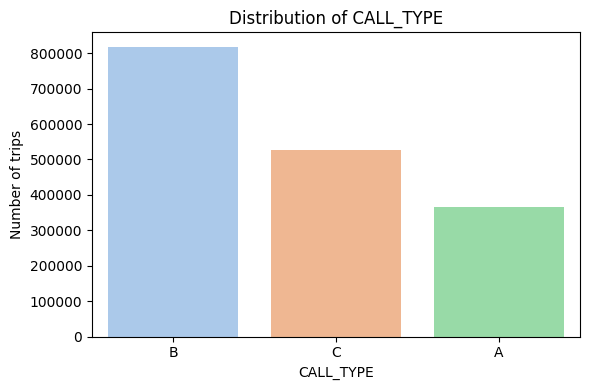

In [44]:
# Get counts of CALL_TYPE
call_counts = df["CALL_TYPE"].value_counts().reset_index()
call_counts.columns = ["CALL_TYPE", "count"]

# Plot with seaborn barplot
plt.figure(figsize=(6,4))
sns.barplot(x="CALL_TYPE", y="count", data=call_counts, palette="pastel")

plt.title("Distribution of CALL_TYPE")
plt.xlabel("CALL_TYPE")
plt.ylabel("Number of trips")
plt.tight_layout()
plt.show()

#### Column: ORIGIN_CALL

In [45]:
top5_origin_calls = df["ORIGIN_CALL"].value_counts().head(5)
print("Top 5 origin_calls:")
print(top5_origin_calls)


unique_origin_calls = df["ORIGIN_CALL"].nunique()
print("Number of different ORIGIN_CALL IDs:", unique_origin_calls)

Top 5 origin_calls:
ORIGIN_CALL
2002.0     57571
63882.0     6406
2001.0      2499
13168.0     1314
6728.0      1115
Name: count, dtype: int64
Number of different ORIGIN_CALL IDs: 57105


#### Column: ORIGIN_STAND

In [46]:
top5_origin_stand = df["ORIGIN_STAND"].value_counts().head(5)
print("Top 5 origin_stand:")
print(top5_origin_stand)

unique_origin_calls = df["ORIGIN_STAND"].nunique()
print("Number of different ORIGIN_STAND IDs:", unique_origin_calls)

Top 5 origin_stand:
ORIGIN_STAND
15.0    80241
57.0    50882
9.0     34818
33.0    34128
23.0    33344
Name: count, dtype: int64
Number of different ORIGIN_STAND IDs: 63


#### Column: TAXI_ID

In [47]:
top5_taxis = df["TAXI_ID"].value_counts().head(5)
print("Top 5 taxis with most trips:")
print(top5_taxis)

num_unique_taxis = df["TAXI_ID"].nunique()
print("\nTotal number of unique taxis:", num_unique_taxis)

Top 5 taxis with most trips:
TAXI_ID
20000080    10746
20000403     9238
20000066     8449
20000364     7821
20000483     7729
Name: count, dtype: int64

Total number of unique taxis: 448


#### Column: TIMESTAMP


#### Column: DAY_TYPE

C:\Users\jensc\AppData\Local\Temp\ipykernel_32892\3375176248.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="DAY_TYPE", y="count", data=day_counts, palette="muted")


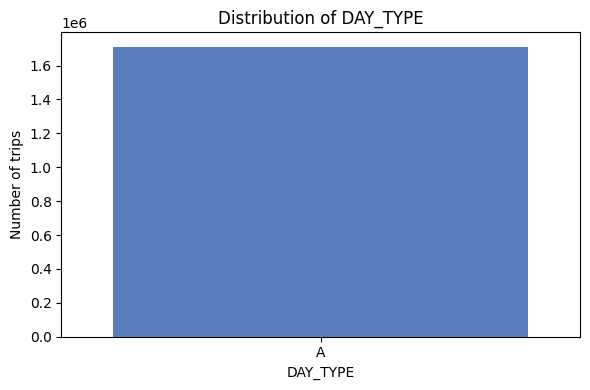

In [48]:
day_counts = df["DAY_TYPE"].value_counts().reset_index()
day_counts.columns = ["DAY_TYPE", "count"]

plt.figure(figsize=(6,4))
sns.barplot(x="DAY_TYPE", y="count", data=day_counts, palette="muted")
plt.title("Distribution of DAY_TYPE")
plt.xlabel("DAY_TYPE")
plt.ylabel("Number of trips")
plt.tight_layout()
plt.show()

#### Column: MISSING_DATA

#### Column: POLYLINE

Minimum number of polyline points: 0
Maximum number of polyline points: 3881


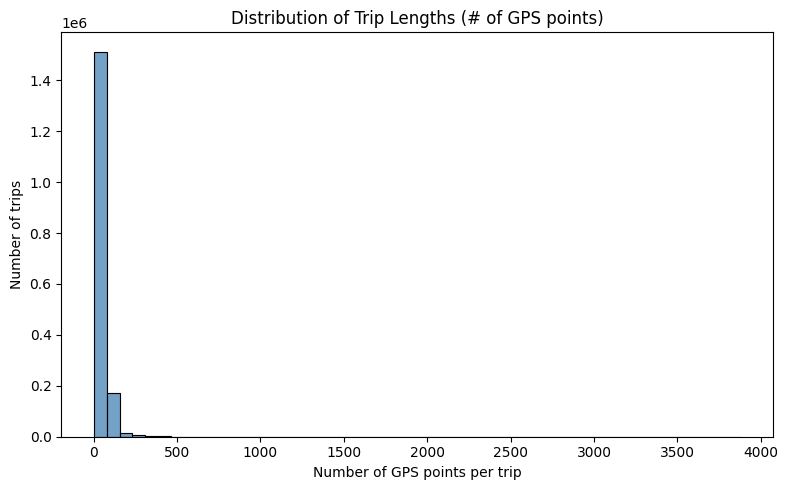

In [49]:
import json



def parse_poly(s):
    try:
        return json.loads(s)
    except Exception:
        return []
    
df["POLYLINE"] = df["POLYLINE"].apply(parse_poly)
df["NUM_POINTS"] = df["POLYLINE"].apply(len)

# Find min and max
min_points = df["NUM_POINTS"].min()
max_points = df["NUM_POINTS"].max()
print("Minimum number of polyline points:", min_points)
print("Maximum number of polyline points:", max_points)

plt.figure(figsize=(8,5))
sns.histplot(df["NUM_POINTS"], bins=50, color="steelblue")
plt.title("Distribution of Trip Lengths (# of GPS points)")
plt.xlabel("Number of GPS points per trip")
plt.ylabel("Number of trips")
plt.tight_layout()
plt.show()